In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from twarc import Twarc
import sqlite3
import os
import glob

## Data Collection for Covid-Related Policies and Restrictions
Import CSV into dataframes

In [45]:
testing_policy = pd.read_csv("raw_data/covid-19-testing-policy.csv")
contact_tracing = pd.read_csv("raw_data/covid-contact-tracing.csv")
#contaiment_health_index = pd.read_csv("raw_data/covid-containment-and-health-index.csv")
vacc_policy = pd.read_csv("raw_data/covid-vaccination-policy.csv")
debt_relief = pd.read_csv("raw_data/debt-relief-covid.csv")
face_covering = pd.read_csv("raw_data/face-covering-policies-covid.csv")
income_support = pd.read_csv("raw_data/income-support-covid.csv")
internal_movement = pd.read_csv("raw_data/internal-movement-covid.csv")
international_travel = pd.read_csv("raw_data/international-travel-covid.csv")
public_campaigns = pd.read_csv("raw_data/public-campaigns-covid.csv")
public_events = pd.read_csv("raw_data/public-events-covid.csv")
public_gathering = pd.read_csv("raw_data/public-gathering-rules-covid.csv")
public_transport = pd.read_csv("raw_data/public-transport-covid.csv")
school_closures = pd.read_csv("raw_data/school-closures-covid.csv")
stay_at_home = pd.read_csv("raw_data/stay-at-home-covid.csv")
workplace_closures = pd.read_csv("raw_data/workplace-closures-covid.csv")
#covid_data = pd.read_csv("raw_data/owid-covid-data.csv")

### Simple version: International Travel && Testing Policy, US
Date Range: 2020-03-01 to 2022-03-01 (announced pandemic by WHO on 3/11)

#### Cleaning Dataframe for USA

In [288]:
US_df = international_travel[international_travel["Code"] == "USA"]
US_df = US_df.drop(["Code"],axis=1)
US_df = US_df.rename({"Entity":"Country"},axis=1)
US_df["Day"]= pd.to_datetime(US_df["Day"])
US_df = US_df.loc[(US_df['Day'] >= '2020-03-20') & (US_df['Day'] <= '2022-09-20')]

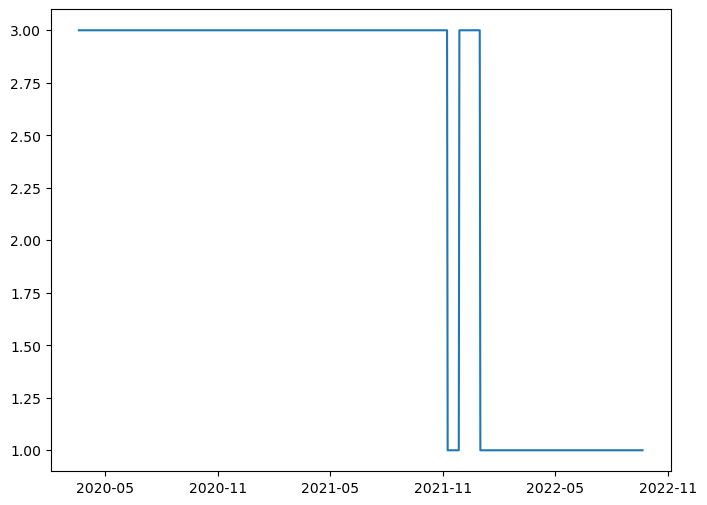

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(US_df.Day, US_df.international_travel_controls);

# Data Collection of Twitter ID and sentiment score
Combine the csv files from each year together

In [206]:
file_path = '/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/2021'

In [207]:
file_list = os.listdir(file_path)

In [22]:
"""This combines all the csv files in a folder together into a dataframe"""
#change directory to 2020 (cd 2020)
csv_files_2020 = glob.glob('*.{}'.format('csv'))
df_2020 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2020 ], ignore_index=True)

In [211]:
#change directory to 2021 (cd 2021)
csv_files_2021 = glob.glob('*.{}'.format('csv'))
df_2021 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2021 ], ignore_index=True)

In [28]:
#change directory to 2021 (cd 2021)
csv_files_2022 = glob.glob('*.{}'.format('csv'))
df_2022 = pd.concat([pd.read_csv(f,header=None) for f in csv_files_2022 ], ignore_index=True)

In [29]:
#df_2020.to_csv("concat_2020.csv")

In [212]:
df_2021.to_csv("concat_2021.csv")

In [31]:
#df_2022.to_csv("concat_2022.csv")

## Export tweet id for hydration
Keep only Twitter ID and remove Sentiment Score column. 
Hydration means using the hydrator to extract the information of the tweets (percisely dates created and location) based on the Twitter ID

In [213]:
df_2020 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2020.csv")
df_2021 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2021.csv")
df_2022 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/concat_2022.csv")

In [214]:
df_2020 = df_2020.drop(columns=["Unnamed: 0"])
df_2021 = df_2021.drop(columns=["Unnamed: 0"])
df_2022 = df_2022.drop(columns=["Unnamed: 0"])

In [220]:
"""Extract first column of dataframe for the Twitter ID, that can be used in the hydrator"""
#df_2020_id = df_2020[0]
#df_2020_id.to_csv("df_2020_id.csv", index=False, header=None)

df_2021_id = df_2021["0"]
df_2021_id.to_csv("df_2021_id.csv", index=False, header=None)

#df_2022_id = df_2022[0]
#df_2022_id.to_csv("df_2022_id.csv", index=False, header=None)

In [222]:
"""A hydrator was used to extract the content of the tweets"""
hydrated_2020 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2020_hydrate.csv")
hydrated_2021 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2021_hydrate.csv")
hydrated_2022 = pd.read_csv("/Users/jennychan/Desktop/Data Science Capstone/raw_twitter_id/df_2022_hydrate.csv")

### Extract "id", "created_at", and "place" and merge with sentiment score

In [263]:
"""Create new dataframe with the Twitter ID, location, and date of the tweets"""
tweet_2020 = pd.DataFrame(hydrated_2020, columns = ["id","created_at","place"])
tweet_2021 = pd.DataFrame(hydrated_2021, columns = ["id","created_at","place"])
tweet_2022 = pd.DataFrame(hydrated_2022, columns = ["id","created_at","place"])

In [264]:
df_2020.columns = ["id","sentiment score"]
df_2021.columns = ["id","sentiment score"]
df_2022.columns = ["id","sentiment score"]

In [265]:
"""Merge dataframes from hydration and sentiment score together, on ID"""
final_df_2020 = pd.merge(tweet_2020, df_2020, on='id')
final_df_2021 = pd.merge(tweet_2021, df_2021, on='id')
final_df_2022 = pd.merge(tweet_2022, df_2022, on='id')

In [226]:
final_df_2020.to_csv("final_df_2020.csv")
final_df_2021.to_csv("final_df_2021.csv")
final_df_2022.to_csv("final_df_2022.csv")

### Extract country names from the location given
(Use same code from CS234 Final Project)

/Users/jennychan/Desktop/Data Science Capstone


In [115]:
final_df_2020 = pd.read_csv("final_df_2020.csv")
final_df_2021 = pd.read_csv("final_df_2021.csv")
final_df_2022 = pd.read_csv("final_df_2022.csv")

In [116]:
final_df_2020 = final_df_2020.drop(columns=["Unnamed: 0"])
final_df_2021 = final_df_2021.drop(columns=["Unnamed: 0"])
final_df_2022 = final_df_2022.drop(columns=["Unnamed: 0"])

In [117]:
final_df_2020["Country"] = final_df_2020["place"]
final_df_2021["Country"] = final_df_2021["place"]
final_df_2022["Country"] = final_df_2022["place"]

In [118]:
"""Add column year to indicate the year of the tweet """
final_df_2020["year"] = "2020"
final_df_2021["year"] = "2021"
final_df_2022["year"] = "2022"

In [119]:
final = pd.concat([final_df_2020,final_df_2021,final_df_2022])

In [120]:
"""Keep track of whether the country has been extracted or not"""
final["changed"] = ""
final

,id,created_at,place,sentiment score,Country,year,changed
0,1247081204698005506,Mon Apr 06 08:38:23 +0000 2020,"Melbourne, Victoria",0.125935,"Melbourne, Victoria",2020,
1,1247045759108886528,Mon Apr 06 06:17:32 +0000 2020,"Jaipur, India",-0.350000,"Jaipur, India",2020,
2,1247052764317876224,Mon Apr 06 06:45:22 +0000 2020,"Dutse, Nigeria",-0.077778,"Dutse, Nigeria",2020,
3,1247080846949040129,Mon Apr 06 08:36:58 +0000 2020,"Manhattan, NY",0.000000,"Manhattan, NY",2020,
4,1247101846050742272,Mon Apr 06 10:00:24 +0000 2020,"Suleja, Nigeria",0.250000,"Suleja, Nigeria",2020,
...,...,...,...,...,...,...,...
26551,1535744703546662913,Sat Jun 11 22:04:04 +0000 2022,"Texas, USA",0.000000,"Texas, USA",2022,
26552,1535642774166544384,Sat Jun 11 15:19:02 +0000 2022,"Mbeya, Tanzania",0.053333,"Mbeya, Tanzania",2022,
26553,1535783766982963201,Sun Jun 12 00:39:18 +0000 2022,"Torrance, CA",0.437500,"Torrance, CA",2022,
26554,1535704764197089281,Sat Jun 11 19:25:22 +0000 2022,"East Providence, RI",0.011111,"East Providence, RI",2022,


In [121]:
"""Check if it's empty, replace NaN value to None"""
final["Country"] = np.where(pd.isnull(final["place"]) == True,"None",final["Country"])
final["place"] = np.where(pd.isnull(final["place"]) == True,"None",final["place"])

In [122]:
final[final["Country"]== "None"]

,id,created_at,place,sentiment score,Country,year,changed
63,1247109120877944837,Mon Apr 06 10:29:19 +0000 2020,None,0.000000,None,2020,
289,1247267263184613382,Mon Apr 06 20:57:43 +0000 2020,None,-0.300000,None,2020,
414,1322774236306444288,Sun Nov 01 05:35:28 +0000 2020,None,0.800000,None,2020,
565,1322890187660288002,Sun Nov 01 13:16:13 +0000 2020,None,0.000000,None,2020,
861,1322989463992213504,Sun Nov 01 19:50:42 +0000 2020,None,0.000000,None,2020,
...,...,...,...,...,...,...,...
24559,1479932934559875079,Sat Jan 08 21:48:02 +0000 2022,None,0.266667,None,2022,
24939,1532407309229498368,Thu Jun 02 17:02:27 +0000 2022,None,0.000000,None,2022,
25865,1491300289965662211,Wed Feb 09 06:37:50 +0000 2022,None,0.000000,None,2022,
26264,1503011857145241600,Sun Mar 13 14:15:26 +0000 2022,None,0.000000,None,2022,


In [123]:
final.to_csv("final_before_country.csv")

# Tweets from USA
If the location contains a state abbreviation, or "USA", change country value to "United States"

In [273]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [274]:
states = '|'.join(states)

In [275]:
"""If the place contains a state abbreviation, place value 1 in changed column and United States in country column"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(states) == True ,"United States", final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(states) == True ,1, final["changed"])

In [276]:
"""If the place name contains USA, change Country value to United States"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("USA"),"United States",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains("USA"),1,final["changed"])

In [277]:
len(final[final["Country"] == "United States"]) ##changed 43% to United States

178050

In [278]:
len(final)

412784

In [279]:
US_final = final[final["Country"] == "United States"]

In [282]:
US_final[US_final["sentiment score"] <0]

,id,created_at,place,sentiment score,Country,year,changed
52,1247042107895939077,Mon Apr 06 06:03:02 +0000 2020,"Bellevue, WA",-0.375000,United States,2020,1
55,1247073168113700864,Mon Apr 06 08:06:27 +0000 2020,"Greenlawn, NY",-0.031818,United States,2020,1
135,1247179695017394176,Mon Apr 06 15:09:45 +0000 2020,"Long Beach, CA",-0.122656,United States,2020,1
142,1247147211919691777,Mon Apr 06 13:00:40 +0000 2020,"Georgia, USA",-0.187500,United States,2020,1
167,1247185521530540034,Mon Apr 06 15:32:54 +0000 2020,"Crofton, MD",-0.155556,United States,2020,1
...,...,...,...,...,...,...,...
26500,1535460747832184833,Sat Jun 11 03:15:44 +0000 2022,"Corona, CA",-0.125000,United States,2022,1
26520,1535692015731613698,Sat Jun 11 18:34:42 +0000 2022,"Boston, MA",-0.390625,United States,2022,1
26532,1535579075397435397,Sat Jun 11 11:05:55 +0000 2022,"Westerville, OH",-0.400000,United States,2022,1
26533,1535757028588519429,Sat Jun 11 22:53:03 +0000 2022,"Wethersfield, CT",-0.500000,United States,2022,1


In [280]:
US_final.to_csv("US_final.csv")

# Tweets from Canada
From Provinces

In [124]:
canadian_provinces = ['Alberta','British Columbia','Manitoba','New Brunswick',
                      'Newfoundland and Labrador','Northwest Territories','Nova Scotia',
                      'Nunavut','Ontario','Prince Edward Island','Québec','Saskatchewan','Yukon']
final_canada = '|'.join(canadian_provinces)

In [125]:
"""If the place name contains a Canadian province, change Country value to Canada"""
final["Country"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(final_canada),"Canada",final["Country"])
final["changed"] = np.where(final["place"].str.split(",",expand = False).str[-1].str.contains(final_canada),1,final["changed"])

In [126]:
len(final[final["Country"] == "Canada"]) ##changed 43950

43950

In [177]:
Can_final = final[final["Country"] == "Canada"]

In [179]:
Can_final.to_csv("Canada_final.csv")

In [182]:
CAN_sentiment = Can_final[["created_at","sentiment score"]] #keep date and sentiment score only

In [183]:
CAN_sentiment['created_at'] = pd.to_datetime(CAN_sentiment['created_at'])
CAN_sentiment['created_at'] = CAN_sentiment['created_at'].dt.date

/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_61169/16065481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAN_sentiment['created_at'] = pd.to_datetime(CAN_sentiment['created_at'])
/var/folders/cb/cslgs9ts54s2pfw_2qbgwwg80000gn/T/ipykernel_61169/16065481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAN_sentiment['created_at'] = CAN_sentiment['created_at'].dt.date


In [184]:
CAN_sentiment = CAN_sentiment.rename(columns = {"created_at":"Day"})

In [185]:
CAN_sentiment = CAN_sentiment[CAN_sentiment['sentiment score'] != 0] #drop 0 sentiment scores

## Combine Tweet info (date, sentiment score) with policies restriction levels
Include International Travel Restriction (international_travel), Facial Covering Policy (face_covering), Stay at Home Policy (stay_at_home), and Public Transport Closure (public_transport). 

Date Range: 2020-03-19 to 2022-09-30

In [55]:
US_sentiment = pd.read_csv("US_final.csv")

In [56]:
US_sentiment = US_sentiment[["created_at","sentiment score"]] #keep date and sentiment score only

In [57]:
#turn to date format
US_sentiment['created_at'] = pd.to_datetime(US_sentiment['created_at'])
US_sentiment['created_at'] = US_sentiment['created_at'].dt.date

In [61]:
US_sentiment = US_sentiment.rename(columns = {"created_at":"Day"})

In [58]:
US_sentiment = US_sentiment[US_sentiment['sentiment score'] != 0] #drop 0 sentiment scores

### Clean Policies dataframe
Include International Travel Restriction (international_travel), Facial Covering Policy (face_covering), Stay at Home Policy (stay_at_home), and Public Transport Closure (public_transport).

In [ ]:
testing_policy = pd.read_csv("raw_data/covid-19-testing-policy.csv")
contact_tracing = pd.read_csv("raw_data/covid-contact-tracing.csv")
#contaiment_health_index = pd.read_csv("raw_data/covid-containment-and-health-index.csv")
vacc_policy = pd.read_csv("raw_data/covid-vaccination-policy.csv")
debt_relief = pd.read_csv("raw_data/debt-relief-covid.csv")
face_covering = pd.read_csv("raw_data/face-covering-policies-covid.csv") ##
income_support = pd.read_csv("raw_data/income-support-covid.csv")
internal_movement = pd.read_csv("raw_data/internal-movement-covid.csv")
international_travel = pd.read_csv("raw_data/international-travel-covid.csv") ##
public_campaigns = pd.read_csv("raw_data/public-campaigns-covid.csv")
public_events = pd.read_csv("raw_data/public-events-covid.csv")
public_gathering = pd.read_csv("raw_data/public-gathering-rules-covid.csv")
public_transport = pd.read_csv("raw_data/public-transport-covid.csv") ##
school_closures = pd.read_csv("raw_data/school-closures-covid.csv")
stay_at_home = pd.read_csv("raw_data/stay-at-home-covid.csv") ##
workplace_closures = pd.read_csv("raw_data/workplace-closures-covid.csv")

In [130]:
US_testing = testing_policy[testing_policy["Code"] == "USA"] #filter and keep US only
US_testing = US_testing[["Day","testing_policy"]] #keep two columns
#2020-03-19 to 2022-09-30
US_testing["Day"]= pd.to_datetime(US_testing["Day"])
US_testing = US_testing.loc[(US_testing['Day'] >= '2020-03-19') & (US_testing['Day'] <= '2022-09-30')]

In [133]:
US_tracing = contact_tracing[contact_tracing["Code"] == "USA"] #filter and keep US only
US_tracing = US_tracing[["Day","contact_tracing"]] #keep two columns
#2020-03-19 to 2022-09-30
US_tracing["Day"]= pd.to_datetime(US_tracing["Day"])
US_tracing = US_tracing.loc[(US_tracing['Day'] >= '2020-03-19') & (US_tracing['Day'] <= '2022-09-30')]

In [137]:
US_vacc = vacc_policy[vacc_policy["Code"] == "USA"] #filter and keep US only
US_vacc = US_vacc[["Day","vaccination_policy"]] #keep two columns
#2020-03-19 to 2022-09-30
US_vacc["Day"]= pd.to_datetime(US_vacc["Day"])
US_vacc = US_vacc.loc[(US_vacc['Day'] >= '2020-03-19') & (US_vacc['Day'] <= '2022-09-30')]

In [140]:
US_debt = debt_relief[debt_relief["Code"] == "USA"] #filter and keep US only
US_debt = US_debt[["Day","debt_relief"]] #keep two columns
#2020-03-19 to 2022-09-30
US_debt["Day"]= pd.to_datetime(US_debt["Day"])
US_debt = US_debt.loc[(US_debt['Day'] >= '2020-03-19') & (US_debt['Day'] <= '2022-09-30')]

In [142]:
US_income = income_support[income_support["Code"] == "USA"] #filter and keep US only
US_income = US_income[["Day","income_support"]] #keep two columns
#2020-03-19 to 2022-09-30
US_income["Day"]= pd.to_datetime(US_income["Day"])
US_income = US_income.loc[(US_income['Day'] >= '2020-03-19') & (US_income['Day'] <= '2022-09-30')]

In [148]:
US_internal = internal_movement[internal_movement["Code"] == "USA"] #filter and keep US only
US_internal = US_internal[["Day","restrictions_internal_movements"]] #keep two columns
#2020-03-19 to 2022-09-30
US_internal["Day"]= pd.to_datetime(US_internal["Day"])
US_internal = US_internal.loc[(US_internal['Day'] >= '2020-03-19') & (US_internal['Day'] <= '2022-09-30')]

In [152]:
US_campaigns = public_campaigns[public_campaigns["Code"] == "USA"] #filter and keep US only
US_campaigns = US_campaigns[["Day","public_information_campaigns"]] #keep two columns
#2020-03-19 to 2022-09-30
US_campaigns["Day"]= pd.to_datetime(US_campaigns["Day"])
US_campaigns = US_campaigns.loc[(US_campaigns['Day'] >= '2020-03-19') & (US_campaigns['Day'] <= '2022-09-30')]

In [155]:
US_public_events = public_events[public_events["Code"] == "USA"] #filter and keep US only
US_public_events = US_public_events[["Day","cancel_public_events"]] #keep two columns
#2020-03-19 to 2022-09-30
US_public_events["Day"]= pd.to_datetime(US_public_events["Day"])
US_public_events = US_public_events.loc[(US_public_events['Day'] >= '2020-03-19') & (US_public_events['Day'] <= '2022-09-30')]

In [156]:
US_gathering = public_gathering[public_gathering["Code"] == "USA"] #filter and keep US only
US_gathering = US_gathering[["Day","restriction_gatherings"]] #keep two columns
#2020-03-19 to 2022-09-30
US_gathering["Day"]= pd.to_datetime(US_gathering["Day"])
US_gathering = US_gathering.loc[(US_gathering['Day'] >= '2020-03-19') & (US_gathering['Day'] <= '2022-09-30')]

In [162]:
US_school = school_closures[school_closures["Code"] == "USA"] #filter and keep US only
US_school = US_school[["Day","school_closures"]] #keep two columns
#2020-03-19 to 2022-09-30
US_school["Day"]= pd.to_datetime(US_school["Day"])
US_school = US_school.loc[(US_school['Day'] >= '2020-03-19') & (US_school['Day'] <= '2022-09-30')]

In [164]:
US_workplace = workplace_closures[workplace_closures["Code"] == "USA"] #filter and keep US only
US_workplace = US_workplace[["Day","workplace_closures"]] #keep two columns
#2020-03-19 to 2022-09-30
US_workplace["Day"]= pd.to_datetime(US_workplace["Day"])
US_workplace = US_workplace.loc[(US_workplace['Day'] >= '2020-03-19') & (US_workplace['Day'] <= '2022-09-30')]

## Original 4

In [32]:
US_travel = international_travel[international_travel["Code"] == "USA"] #filter and keep US only
US_travel = US_travel[["Day","international_travel_controls"]] #keep two columns
#2020-03-19 to 2022-09-30
US_travel["Day"]= pd.to_datetime(US_travel["Day"])
US_travel = US_travel.loc[(US_travel['Day'] >= '2020-03-19') & (US_travel['Day'] <= '2022-09-30')]

In [46]:
US_mask = face_covering[face_covering["Code"] == "USA"] #filter and keep US only
US_mask = US_mask[["Day","facial_coverings"]]#keep two columns
#2020-03-19 to 2022-09-30
US_mask["Day"]= pd.to_datetime(US_mask["Day"])
US_mask = US_mask.loc[(US_mask['Day'] >= '2020-03-19') & (US_mask['Day'] <= '2022-09-30')]

In [49]:
US_stay_at_home = stay_at_home[stay_at_home["Code"] == "USA"] #filter and keep US only
US_stay_at_home = US_stay_at_home[["Day","stay_home_requirements"]]#keep two columns
#2020-03-19 to 2022-09-30
US_stay_at_home["Day"]= pd.to_datetime(US_stay_at_home["Day"])
US_stay_at_home = US_stay_at_home.loc[(US_stay_at_home['Day'] >= '2020-03-19') & (US_stay_at_home['Day'] <= '2022-09-30')]

In [52]:
US_transport = public_transport[public_transport["Code"] == "USA"] #filter and keep US only
US_transport = US_transport[["Day","close_public_transport"]]#keep two columns
#2020-03-19 to 2022-09-30
US_transport["Day"]= pd.to_datetime(US_transport["Day"])
US_transport = US_transport.loc[(US_transport['Day'] >= '2020-03-19') & (US_transport['Day'] <= '2022-09-30')]

## Combine US_sentiment, US_travel, US_mask, US_stay_at_home, US_transport according to dates

In [102]:
US_sentiment['Day']=US_sentiment['Day'].astype('datetime64[ns]')
US_travel['Day']=US_travel['Day'].astype('datetime64[ns]')
US_mask['Day']=US_mask['Day'].astype('datetime64[ns]')
US_stay_at_home['Day']=US_stay_at_home['Day'].astype('datetime64[ns]')
US_transport['Day']=US_transport['Day'].astype('datetime64[ns]')

In [168]:
from functools import reduce
#merge all columuns together
data_frames = [US_sentiment, US_travel, US_mask, US_stay_at_home, US_transport, US_testing, US_tracing, US_vacc, US_debt, US_income, US_internal, US_campaigns, US_public_events, US_gathering, US_school, US_workplace]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Day'],
                                            how='outer'), data_frames)
df_merged.sort_values(by='Day')

,Day,sentiment score,international_travel_controls,facial_coverings,stay_home_requirements,close_public_transport,testing_policy,contact_tracing,vaccination_policy,debt_relief,income_support,restrictions_internal_movements,public_information_campaigns,cancel_public_events,restriction_gatherings,school_closures,workplace_closures
74800,2020-03-19,-0.327778,3,1,2,1,3,1,0,0,0,2,2,2,2,3,3
74783,2020-03-19,0.121591,3,1,2,1,3,1,0,0,0,2,2,2,2,3,3
74782,2020-03-19,0.600000,3,1,2,1,3,1,0,0,0,2,2,2,2,3,3
74781,2020-03-19,-0.166667,3,1,2,1,3,1,0,0,0,2,2,2,2,3,3
74780,2020-03-19,0.428030,3,1,2,1,3,1,0,0,0,2,2,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119822,2022-09-30,0.233333,1,2,1,0,3,1,5,0,0,0,2,0,0,1,1
119823,2022-09-30,0.500000,1,2,1,0,3,1,5,0,0,0,2,0,0,1,1
119824,2022-09-30,-0.050000,1,2,1,0,3,1,5,0,0,0,2,0,0,1,1
119810,2022-09-30,0.020833,1,2,1,0,3,1,5,0,0,0,2,0,0,1,1


In [176]:
len(df_merged.columns)

17

In [169]:
df_merged.to_csv("US_all_merged.csv")

# Canada

In [191]:
CAN_testing = testing_policy[testing_policy["Code"] == "CAN"] #filter and keep US only
CAN_testing = CAN_testing[["Day","testing_policy"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_testing["Day"]= pd.to_datetime(CAN_testing["Day"])
CAN_testing = CAN_testing.loc[(CAN_testing['Day'] >= '2020-03-19') & (CAN_testing['Day'] <= '2022-09-30')]

In [192]:
CAN_tracing = contact_tracing[contact_tracing["Code"] == "CAN"] #filter and keep US only
CAN_tracing = CAN_tracing[["Day","contact_tracing"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_tracing["Day"]= pd.to_datetime(CAN_tracing["Day"])
CAN_tracing = CAN_tracing.loc[(CAN_tracing['Day'] >= '2020-03-19') & (CAN_tracing['Day'] <= '2022-09-30')]

In [193]:
CAN_vacc = vacc_policy[vacc_policy["Code"] == "CAN"] #filter and keep US only
CAN_vacc = CAN_vacc[["Day","vaccination_policy"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_vacc["Day"]= pd.to_datetime(CAN_vacc["Day"])
CAN_vacc = CAN_vacc.loc[(CAN_vacc['Day'] >= '2020-03-19') & (CAN_vacc['Day'] <= '2022-09-30')]

In [194]:
CAN_debt = debt_relief[debt_relief["Code"] == "CAN"] #filter and keep US only
CAN_debt = CAN_debt[["Day","debt_relief"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_debt["Day"]= pd.to_datetime(CAN_debt["Day"])
CAN_debt = CAN_debt.loc[(CAN_debt['Day'] >= '2020-03-19') & (CAN_debt['Day'] <= '2022-09-30')]

In [195]:
CAN_income = income_support[income_support["Code"] == "CAN"] #filter and keep US only
CAN_income = CAN_income[["Day","income_support"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_income["Day"]= pd.to_datetime(CAN_income["Day"])
CAN_income = CAN_income.loc[(CAN_income['Day'] >= '2020-03-19') & (CAN_income['Day'] <= '2022-09-30')]

In [196]:
CAN_internal = internal_movement[internal_movement["Code"] == "CAN"] #filter and keep US only
CAN_internal = CAN_internal[["Day","restrictions_internal_movements"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_internal["Day"]= pd.to_datetime(CAN_internal["Day"])
CAN_internal = CAN_internal.loc[(CAN_internal['Day'] >= '2020-03-19') & (CAN_internal['Day'] <= '2022-09-30')]

In [197]:
CAN_campaigns = public_campaigns[public_campaigns["Code"] == "CAN"] #filter and keep US only
CAN_campaigns = CAN_campaigns[["Day","public_information_campaigns"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_campaigns["Day"]= pd.to_datetime(CAN_campaigns["Day"])
CAN_campaigns = CAN_campaigns.loc[(CAN_campaigns['Day'] >= '2020-03-19') & (CAN_campaigns['Day'] <= '2022-09-30')]

In [199]:
CAN_public_events = public_events[public_events["Code"] == "CAN"] #filter and keep US only
CAN_public_events = CAN_public_events[["Day","cancel_public_events"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_public_events["Day"]= pd.to_datetime(CAN_public_events["Day"])
CAN_public_events = CAN_public_events.loc[(CAN_public_events['Day'] >= '2020-03-19') & (CAN_public_events['Day'] <= '2022-09-30')]

In [200]:
CAN_gathering = public_gathering[public_gathering["Code"] == "CAN"] #filter and keep US only
CAN_gathering = CAN_gathering[["Day","restriction_gatherings"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_gathering["Day"]= pd.to_datetime(CAN_gathering["Day"])
CAN_gathering = CAN_gathering.loc[(CAN_gathering['Day'] >= '2020-03-19') & (CAN_gathering['Day'] <= '2022-09-30')]

In [202]:
CAN_school = school_closures[school_closures["Code"] == "CAN"] #filter and keep US only
CAN_school = CAN_school[["Day","school_closures"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_school["Day"]= pd.to_datetime(CAN_school["Day"])
CAN_school = CAN_school.loc[(CAN_school['Day'] >= '2020-03-19') & (CAN_school['Day'] <= '2022-09-30')]

In [203]:
CAN_workplace = workplace_closures[workplace_closures["Code"] == "CAN"] #filter and keep US only
CAN_workplace = CAN_workplace[["Day","workplace_closures"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_workplace["Day"]= pd.to_datetime(CAN_workplace["Day"])
CAN_workplace = CAN_workplace.loc[(CAN_workplace['Day'] >= '2020-03-19') & (CAN_workplace['Day'] <= '2022-09-30')]

In [204]:
CAN_travel = international_travel[international_travel["Code"] == "CAN"] #filter and keep US only
CAN_travel = CAN_travel[["Day","international_travel_controls"]] #keep two columns
#2020-03-19 to 2022-09-30
CAN_travel["Day"]= pd.to_datetime(CAN_travel["Day"])
CAN_travel = CAN_travel.loc[(CAN_travel['Day'] >= '2020-03-19') & (CAN_travel['Day'] <= '2022-09-30')]

In [205]:
CAN_mask = face_covering[face_covering["Code"] == "CAN"] #filter and keep US only
CAN_mask = CAN_mask[["Day","facial_coverings"]]#keep two columns
#2020-03-19 to 2022-09-30
CAN_mask["Day"]= pd.to_datetime(CAN_mask["Day"])
CAN_mask = CAN_mask.loc[(CAN_mask['Day'] >= '2020-03-19') & (CAN_mask['Day'] <= '2022-09-30')]

In [207]:
CAN_stay_at_home = stay_at_home[stay_at_home["Code"] == "CAN"] #filter and keep US only
CAN_stay_at_home = CAN_stay_at_home[["Day","stay_home_requirements"]]#keep two columns
#2020-03-19 to 2022-09-30
CAN_stay_at_home["Day"]= pd.to_datetime(CAN_stay_at_home["Day"])
CAN_stay_at_home = CAN_stay_at_home.loc[(CAN_stay_at_home['Day'] >= '2020-03-19') & (CAN_stay_at_home['Day'] <= '2022-09-30')]

In [208]:
CAN_transport = public_transport[public_transport["Code"] == "CAN"] #filter and keep US only
CAN_transport = CAN_transport[["Day","close_public_transport"]]#keep two columns
#2020-03-19 to 2022-09-30
CAN_transport["Day"]= pd.to_datetime(CAN_transport["Day"])
CAN_transport = CAN_transport.loc[(CAN_transport['Day'] >= '2020-03-19') & (CAN_transport['Day'] <= '2022-09-30')]

In [210]:
CAN_sentiment['Day']=CAN_sentiment['Day'].astype('datetime64[ns]')


In [211]:
#merge all columuns together
data_frames = [CAN_sentiment, CAN_travel, CAN_mask, CAN_stay_at_home, CAN_transport, CAN_testing, CAN_tracing, CAN_vacc, CAN_debt, CAN_income, CAN_internal, CAN_campaigns, CAN_public_events, CAN_gathering, CAN_school, CAN_workplace]
df_merged_CAN = reduce(lambda  left,right: pd.merge(left,right,on=['Day'],
                                            how='outer'), data_frames)
df_merged_CAN.sort_values(by='Day')

,Day,sentiment score,international_travel_controls,facial_coverings,stay_home_requirements,close_public_transport,testing_policy,contact_tracing,vaccination_policy,debt_relief,income_support,restrictions_internal_movements,public_information_campaigns,cancel_public_events,restriction_gatherings,school_closures,workplace_closures
15806,2020-03-19,0.200000,4,0,2,0,2,1,0,1,2,0,2,2,3,3,3
15805,2020-03-19,0.265104,4,0,2,0,2,1,0,1,2,0,2,2,3,3,3
15784,2020-03-20,0.150000,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
15797,2020-03-20,0.800000,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
15798,2020-03-20,0.116667,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30786,2022-09-30,0.250000,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
30785,2022-09-30,-0.097917,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
30784,2022-09-30,0.068182,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
30783,2022-09-30,0.100000,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0


In [230]:
CAN_policies = [CAN_travel, CAN_mask, CAN_stay_at_home, CAN_transport, CAN_testing, CAN_tracing, CAN_vacc, CAN_debt, CAN_income, CAN_internal, CAN_campaigns, CAN_public_events, CAN_gathering, CAN_school, CAN_workplace]
df_merged_CAN = reduce(lambda  left,right: pd.merge(left,right,on=['Day'],
                                            how='outer'), CAN_policies)
df_merged_CAN.to_csv("CAN_policies.csv")

In [229]:
df_merged_CAN.to_csv("CAN_all_merged.csv")

In [228]:
df_merged_CAN

,Day,international_travel_controls,facial_coverings,stay_home_requirements,close_public_transport,testing_policy,contact_tracing,vaccination_policy,debt_relief,income_support,restrictions_internal_movements,public_information_campaigns,cancel_public_events,restriction_gatherings,school_closures,workplace_closures
0,2020-03-19,4,0,2,0,2,1,0,1,2,0,2,2,3,3,3
1,2020-03-20,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
2,2020-03-21,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
3,2020-03-22,4,0,2,0,2,1,0,1,2,2,2,2,3,3,3
4,2020-03-23,4,0,2,0,2,1,0,1,2,2,2,2,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2022-09-26,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
922,2022-09-27,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
923,2022-09-28,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
924,2022-09-29,1,2,0,1,1,1,5,1,0,0,1,0,0,0,0
